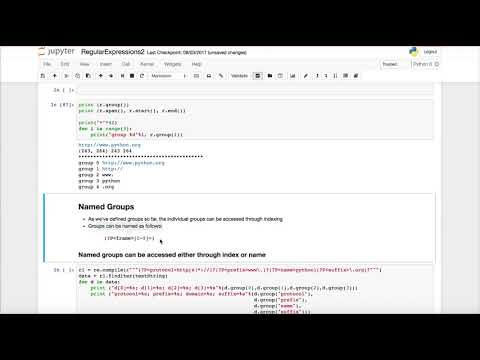

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("ZwqEwihsyVE", width=800, height=600)

# Regular Expressions Part 2
### My goto reference is the [Regular Expression How To](http://docs.python.org/3/howto/regex.html) webpage.

## What this notebook covers

1. Groups
1. Match Objects
3. Named Groups
4. Modifying Strings with Regular Expressions

### Groups
* Individual parts of a regular expression can be identified using parentheses **()**. 
* These are then known as *GROUPS*. 
* Groups can be made optional by putting a question mark **(?)** after the group. 


# Examples

In [ ]:
testString = """
Br. Chapman died yesterday. Brian Chapman, much beloved, Brian E. Chapman Brian Earl Chapman 
Wendy Webber Chapman Clare 
1234 4321.1234 Clare A Chapman python python.org 
http://python.org www.python.org jython zython Brad Bob cpython brian http://www.python.org perl Perl PERL
https://www.utah.edu

https://www.python.org"""

### Here is a regular expression to match `python` or `perl`
```Python
r"""(p(ython|erl))"""
```
#### This uses a group `ython|erl` within a larger group

In [ ]:
e4 = r"""(p(ython|erl))"""
f = re.compile(e4)
rslts4 = f.findall(testString)
print (e4)
print (testString)
for r in rslts4:
    print (r)
print ("*"*42)


### Note that `findall` returns a tuple for each match
#### Each element in the tuple is what matched for each group

### Optional Groups
#### Here is a regular expression to match pars of the python web address
#### All groups are optional except for `python`

In [ ]:
r1 = re.compile(r"""(http[s]*://)?(www\.)?(python)(\.org)?""")
for r in r1.findall(testString):
    print(r)

## Matched Objects
### `findall` is useful: it returns the strings (and the parts) we matched. But...
### There is a more powerful way of working with what we've matched
#### [`finditer`](https://docs.python.org/3/library/re.html#re.finditer): returns an iterator that returns a regular expression [match object](https://docs.python.org/3/library/re.html#match-objects).
* The match object contains methods that describe the attribute of the matched string, for example, the span of the matched string.

In [ ]:
rIter = r1.finditer(testString)

In [ ]:
r = next(rIter)

In [ ]:
print (r.group())
print (r.span(), r.start(), r.end())

print("*"*42)
for i in range(5):
    print("group %d"%i, r.group(i))

## Named Groups
* As we've defined groups so far, the individual groups can be accessed through indexing
* Groups can be named as follows:
```python   
    (?P<frame>[0-9]+)
```    

### Named groups can be accessed either through index or name

In [ ]:
r1 = re.compile(r"""(?P<protocol>http[s]*://)?(?P<prefix>www\.)?(?P<name>python)(?P<suffix>\.org)?""")
data = r1.finditer(testString)
for d in data:
    print ("d[0]=%s; d[1]=%s; d[2]=%s; d[3]=%s"%(d.group(0),d.group(1),d.group(2),d.group(3)))
    print ("protocol=%s; prefix=%s; domain=%s; suffix=%s"%(d.group("protocol"),
                                                           d.group("prefix"),
                                                           d.group("name"),
                                                           d.group("suffix")))
    print('-'*42)


In [ ]:
name = re.compile(r"""((?P<fname>[A-Z][a-z]+)\s((?P<mname>[A-Z][A-Za-z\.]*)\s)?(?P<lname>[A-Z][A-Za-z]+))""")

for n in name.finditer(testString):
    print (n.group(),n.span())
    print (n.group('fname'),n.group('mname'),n.group('lname'))
    print ("*"*42)


## Modifying Strings with re
* Regular expressions can also be used to modify text
* Here is an example where we are identifying multiple white spaces, including tabs and newlines, and replacing them with a single space.

In [ ]:
test = """Brian E.     Chapman\t\n has many bikes, including    a Big  Dummy, which  is probably the\t\t\nbike with   the    best name."""
def cleanText(txt):
    """cleans up whitepsaces in text by replacing series of all whitespaces with a single space"""
    re1 = re.compile(r'''\s+''')
    txt2 = re1.sub(' ',txt)
    return txt2
    
print (test)
print (cleanText(test))